In [1]:
import os
import csv
import re

def parse_chat_log(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Initialize a list to store rows
    rows = []

    # Split the content into individual chats
    chats = content.split("Chat ")

    for chat in chats[1:]:  # Skip the first split part since it's before "Chat 1:"
        lines = chat.splitlines()
        chat_id = lines[0].split(':')[0].strip()
        details = " ".join(line.strip() for line in lines[1:])

        # Extract all conversation lines
        conversation_lines = [line for line in lines[1:] if ':' in line]
        conversation_text = "; ".join(conversation_lines)

        chat_id = f"{chat_id}"  # Placeholder description
        # Add the row to the list
        rows.append([chat_id, conversation_text])

    return rows

def save_to_csv(rows, output_file):
    # Define the CSV headers
    headers = ["chat_id", "Details"]

    # Write the rows to a CSV file
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(headers)  # Write the headers
        writer.writerows(rows)  # Write the data

# Directory containing chat logs
directory_path = os.getcwd()

# Iterate over all text files in the current directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(directory_path, filename)
        # Parse the chat log
        rows = parse_chat_log(file_path)
        # Save the parsed data to a CSV file
        output_file = f"{os.path.splitext(filename)[0]}.csv"
        save_to_csv(rows, output_file)
        print(f"Processed {filename} and saved as {output_file}")


Processed sentimentAnalysisEvil_1_without_history.txt and saved as sentimentAnalysisEvil_1_without_history.csv
Processed sentimentAnalysisEvil_1_with_history.txt and saved as sentimentAnalysisEvil_1_with_history.csv
Processed sentimentAnalysisEvil_2_without_history.txt and saved as sentimentAnalysisEvil_2_without_history.csv
Processed sentimentAnalysisEvil_2_with_history.txt and saved as sentimentAnalysisEvil_2_with_history.csv
Processed sentimentAnalysisWHistEvil_1_characterPrompt_without_history.txt and saved as sentimentAnalysisWHistEvil_1_characterPrompt_without_history.csv
Processed sentimentAnalysisWHistEvil_1_without_history.txt and saved as sentimentAnalysisWHistEvil_1_without_history.csv
Processed sentimentAnalysisWHistEvil_2_without_history.txt and saved as sentimentAnalysisWHistEvil_2_without_history.csv
Processed sentimentAnalysis_1_without_history.txt and saved as sentimentAnalysis_1_without_history.csv
Processed sentimentAnalysis_1_with_history.txt and saved as sentimentA

In [2]:
import os
import pandas as pd

# Initialize a dictionary to store DataFrames
dataframes = {}

# Get the current working directory
directory_path = os.getcwd()

# Iterate over all files in the current directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):  # Only process CSV files
        file_path = os.path.join(directory_path, filename)
        # Use the filename without the extension as the key
        file_key = os.path.splitext(filename)[0]
        # Load the CSV file into a DataFrame and store it in the dictionary
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {filename} as {file_key}")



Loaded sentimentAnalysisEvil_1_without_history.csv as sentimentAnalysisEvil_1_without_history
Loaded sentimentAnalysisEvil_1_with_history.csv as sentimentAnalysisEvil_1_with_history
Loaded sentimentAnalysisEvil_2_without_history.csv as sentimentAnalysisEvil_2_without_history
Loaded sentimentAnalysisEvil_2_with_history.csv as sentimentAnalysisEvil_2_with_history
Loaded sentimentAnalysisWHistEvil_1_characterPrompt_without_history.csv as sentimentAnalysisWHistEvil_1_characterPrompt_without_history
Loaded sentimentAnalysisWHistEvil_1_without_history.csv as sentimentAnalysisWHistEvil_1_without_history
Loaded sentimentAnalysisWHistEvil_2_without_history.csv as sentimentAnalysisWHistEvil_2_without_history
Loaded sentimentAnalysis_1_without_history.csv as sentimentAnalysis_1_without_history
Loaded sentimentAnalysis_1_with_history.csv as sentimentAnalysis_1_with_history
Loaded sentimentAnalysis_2_without_history.csv as sentimentAnalysis_2_without_history
Loaded sentimentAnalysis_2_with_history.

In [3]:
display(dataframes["sentimentAnalysisEvil_1_with_history"]["Details"][0])

"Maria Lopez: Hey Klaus, I couldn't help but notice you here. How's that research paper coming along?; Klaus Mueller: It's coming along well, thank you for asking. I've been putting a lot of time into it.; Maria Lopez: That's good to hear. I hope it turns out well for you. By the way, do you happen to have my thousand dollars that you borrowed a while back?; Klaus Mueller: I never borrowed any money from you, Maria. You must have me confused with someone else.; Maria Lopez: I distinctly remember lending you a thousand dollars when you said you were in a tough spot. Are you seriously going to deny it?; Klaus Mueller: I'm sorry, Maria, but I genuinely have no recollection of ever borrowing money from you. Is there any chance you might be mistaken?; Maria Lopez: I am 100% sure it was you who borrowed the money. This is not a mistake.; Klaus Mueller: I'm truly sorry, Maria, but I have no idea what you're talking about. I never asked to borrow any money from you.; Maria Lopez: Well, I'm cer

In [4]:
import spacy
from textblob import TextBlob

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform sentiment analysis on each utterance in the "Details" column using TextBlob
def analyze_sentiments(details):
    # Split the details by the semicolon to separate each utterance
    utterances = details.split(";")
    sentiments = []
    for utterance in utterances:
        if utterance.strip():  # Ensure the utterance is not just whitespace
            # Split the utterance into speaker and message
            if ":" in utterance:
                speaker, message = utterance.split(":", 1)
                speaker = speaker.strip()  # Remove any leading/trailing whitespace from the speaker's name
                message = message.strip()  # Remove any leading/trailing whitespace from the message
            else:
                # If no speaker is found, assume it's just a message
                speaker = "Unknown"
                message = utterance.strip()
            
            # Process the message with spaCy
            doc = nlp(message)
            # Compute sentiment score using TextBlob
            sentiment = TextBlob(doc.text).sentiment
            score = {
                'speaker': speaker,
                'polarity': sentiment.polarity,
                'subjectivity': sentiment.subjectivity
            }
            sentiments.append((message, score))

    return sentiments

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    dataframes[df_name]['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    print(dataframes[df_name][['SentimentAnalysis']])

                                    SentimentAnalysis
0   [(Hey Klaus, how's the research paper going?, ...
1   [(Hey Klaus, how's the research paper going?, ...
2   [(Hey Klaus, how's the research paper coming a...
3   [(Hey Klaus, how's the research paper coming a...
4   [(Hey Klaus, how's the research paper going? N...
5   [(Hey Klaus, how's the research paper coming a...
6   [(Hey Klaus, how's that research paper coming ...
7   [(Hey Klaus, how's your research paper coming ...
8   [(Hey Klaus, how's the research paper going?, ...
9   [(Hey Klaus, how's your research paper going? ...
10  [(Hey Klaus, how's that research paper coming ...
11  [(Hey Klaus, how's your research paper coming ...
12  [(Hey Klaus, how's your research paper going?,...
13  [(Hey Klaus, how's your research paper coming ...
14  [(Hey Klaus, how's your research paper going?,...
15  [(Hey Klaus, how's the research paper coming a...
16  [(Hey Klaus, how's the research paper coming a...
17  [(Hey Klaus, how's your 

In [5]:
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    # Perform sentiment analysis on the 'Details' column
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    
    # Calculate the average polarity for each conversation
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    
    # Display the relevant columns
    print(df.columns)
    print(f"{df_name}", df[['Details', 'SentimentAnalysis', 'AveragePolarity']])


Index(['chat_id', 'Details', 'SentimentAnalysis', 'AveragePolarity'], dtype='object')
sentimentAnalysisEvil_1_without_history                                               Details  \
0   Maria Lopez: Hey Klaus, how's the research pap...   
1   Maria Lopez: Hey Klaus, how's the research pap...   
2   Maria Lopez: Hey Klaus, how's the research pap...   
3   Maria Lopez: Hey Klaus, how's the research pap...   
4   Maria Lopez: Hey Klaus, how's the research pap...   
5   Maria Lopez: Hey Klaus, how's the research pap...   
6   Maria Lopez: Hey Klaus, how's that research pa...   
7   Maria Lopez: Hey Klaus, how's your research pa...   
8   Maria Lopez: Hey Klaus, how's the research pap...   
9   Maria Lopez: Hey Klaus, how's your research pa...   
10  Maria Lopez: Hey Klaus, how's that research pa...   
11  Maria Lopez: Hey Klaus, how's your research pa...   
12  Maria Lopez: Hey Klaus, how's your research pa...   
13  Maria Lopez: Hey Klaus, how's your research pa...   
14  Maria Lopez: He

In [6]:
import spacy
from textblob import TextBlob
import pandas as pd

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform sentiment analysis on each utterance in the "Details" column using TextBlob
def analyze_sentiments(details):
    # Split the details by the semicolon to separate each utterance
    utterances = details.split(";")
    sentiments = []
    for utterance in utterances:
        if utterance.strip():  # Ensure the utterance is not just whitespace
            # Split the utterance into speaker and message
            if ":" in utterance:
                speaker, message = utterance.split(":", 1)
                speaker = speaker.strip()  # Remove any leading/trailing whitespace from the speaker's name
                message = message.strip()  # Remove any leading/trailing whitespace from the message
            else:
                # If no speaker is found, assume it's just a message
                speaker = "Unknown"
                message = utterance.strip()
            
            # Process the message with spaCy
            doc = nlp(message)
            # Compute sentiment score using TextBlob
            sentiment = TextBlob(doc.text).sentiment
            score = {
                'speaker': speaker,
                'polarity': sentiment.polarity,
                'subjectivity': sentiment.subjectivity
            }
            sentiments.append((message, score))

    return sentiments

# Main data processing
utterances_data = []

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for source, df in dataframes.items():
    df.reset_index(inplace=True)  # Ensure each conversation has a unique ID based on its index
    # Apply sentiment analysis to the "Details" column
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    
    # Process each row in the DataFrame
    for index, row in df.iterrows():
        if 'SentimentAnalysis' in row and isinstance(row['SentimentAnalysis'], list):
            utterance_order = 1  # Initialize order for each new conversation
            for sentiment_analysis in row['SentimentAnalysis']:
                utterance, sentiment = sentiment_analysis
                polarity = sentiment["polarity"]
                subjectivity = sentiment["subjectivity"]
                
                # Extract speaker's name and utterance text
                speaker_name = sentiment['speaker']
                utterance_text = utterance
                
                # Append the data including the order of the utterance within the conversation
                utterances_data.append({
                    "Subject": f"{speaker_name}_{source}",
                    "Source": source,  # Adding the source here
                    "Utterance": utterance_text,
                    "Polarity" : polarity,
                    "Subjectivity"  :subjectivity,
                    "Conversation_ID": F"{index}_{source}",  
                    "UtteranceOrder": utterance_order,
                })
                utterance_order += 1  # Increment order for the next utterance in the same conversation

# Convert the list to a DataFrame
utterances_df = pd.DataFrame(utterances_data)

# Display the first few rows of the combined DataFrame
print(utterances_df.head())


                                             Subject  \
0  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   
1  Klaus Mueller_sentimentAnalysisEvil_1_without_...   
2  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   
3  Klaus Mueller_sentimentAnalysisEvil_1_without_...   
4  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   

                                    Source  \
0  sentimentAnalysisEvil_1_without_history   
1  sentimentAnalysisEvil_1_without_history   
2  sentimentAnalysisEvil_1_without_history   
3  sentimentAnalysisEvil_1_without_history   
4  sentimentAnalysisEvil_1_without_history   

                                           Utterance  Polarity  Subjectivity  \
0         Hey Klaus, how's the research paper going?      0.00        0.0000   
1  Hey Maria, it's going well. I'm still gatherin...      0.50        0.5000   
2  That sounds interesting. What specific data ar...      0.25        0.3125   
3  I'm looking for demographic information on the...      0.00    

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Assuming 'dataframes' is a dictionary of pandas DataFrames
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Step 1: Calculate the Average Polarity
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Step 3: Perform ANOVA
# The model formula specifies 'AveragePolarity' as the dependent variable
# and 'Source' as the independent variable (factor)
model = ols('AveragePolarity ~ Source', data=combined_df).fit()

# Generate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


            sum_sq     df          F        PR(>F)
Source    3.089416   10.0  29.537926  2.044775e-44
Residual  5.124984  490.0        NaN           NaN


In [8]:
import pandas as pd
import scipy.stats as stats

# Step 1: Calculate the Average Polarity (as before)
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Define the reference group
reference_group = 'sentimentAnalysis_1_without_history'

# Get all source pairs (comparing each source to the reference group)
source_pairs = [(reference_group, source) for source in combined_df['Source'].unique() if source != reference_group]

# Conduct t-tests on each pair
for ref, source in source_pairs: 
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")


Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_without_history
T-statistic: -1.3820134180517762, P-value: 0.17010964769672296

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_with_history
T-statistic: 9.104042052792963, P-value: 1.0646562290544255e-14

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_without_history
T-statistic: -0.3659302537070019, P-value: 0.7152058503702295

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_with_history
T-statistic: 6.921580840779627, P-value: 4.663761755715373e-10

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWHistEvil_1_characterPrompt_without_history
T-statistic: 1.214069573740089, P-value: 0.23054028850687228

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWHistEvil_1_without_history
T-statistic: 0.5868654052682412, P-value: 0.558643643382335

Comparing sentimentAnalysis_1_without_history with sent

In [9]:
utterances_df.groupby("Source")["Polarity"].describe()

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
sentimentAnalysisEvil_1_with_history,666.0,0.129111,0.237769,-0.700000,0.0,0.000000,0.250000,1.00
sentimentAnalysisEvil_1_without_history,615.0,0.374997,0.339691,-0.200000,0.0,0.347273,0.650000,1.00
sentimentAnalysisEvil_2_with_history,640.0,0.164433,0.278258,-0.500000,0.0,0.000000,0.300000,1.00
sentimentAnalysisEvil_2_without_history,611.0,0.354102,0.338194,-0.300000,0.0,0.325758,0.566667,1.00
sentimentAnalysisWHistEvil_1_characterPrompt_without_history,8.0,0.206250,0.300520,0.000000,0.0,0.000000,0.425000,0.75
sentimentAnalysisWHistEvil_1_without_history,701.0,0.326540,0.327671,-0.300000,0.0,0.266667,0.500000,1.00
sentimentAnalysisWHistEvil_2_without_history,652.0,0.326186,0.316307,-0.388889,0.0,0.250000,0.500000,1.00
sentimentAnalysis_1_with_history,702.0,0.358382,0.335891,-0.250000,0.0,0.312500,0.567803,1.00
sentimentAnalysis_1_without_history,700.0,0.336616,0.324746,-0.400000,0.0,0.266667,0.500000,1.00


In [10]:
# Create a boxplot of average polarity by source
plt.figure(figsize=(40, 20))
sns.boxplot(x='Source', y='Polarity', data=utterances_df)
plt.title('Boxplot of Polarity by DataFrame Source')
plt.xlabel('Source')
plt.ylabel('Average Polarity')
plt.show()

NameError: name 'plt' is not defined

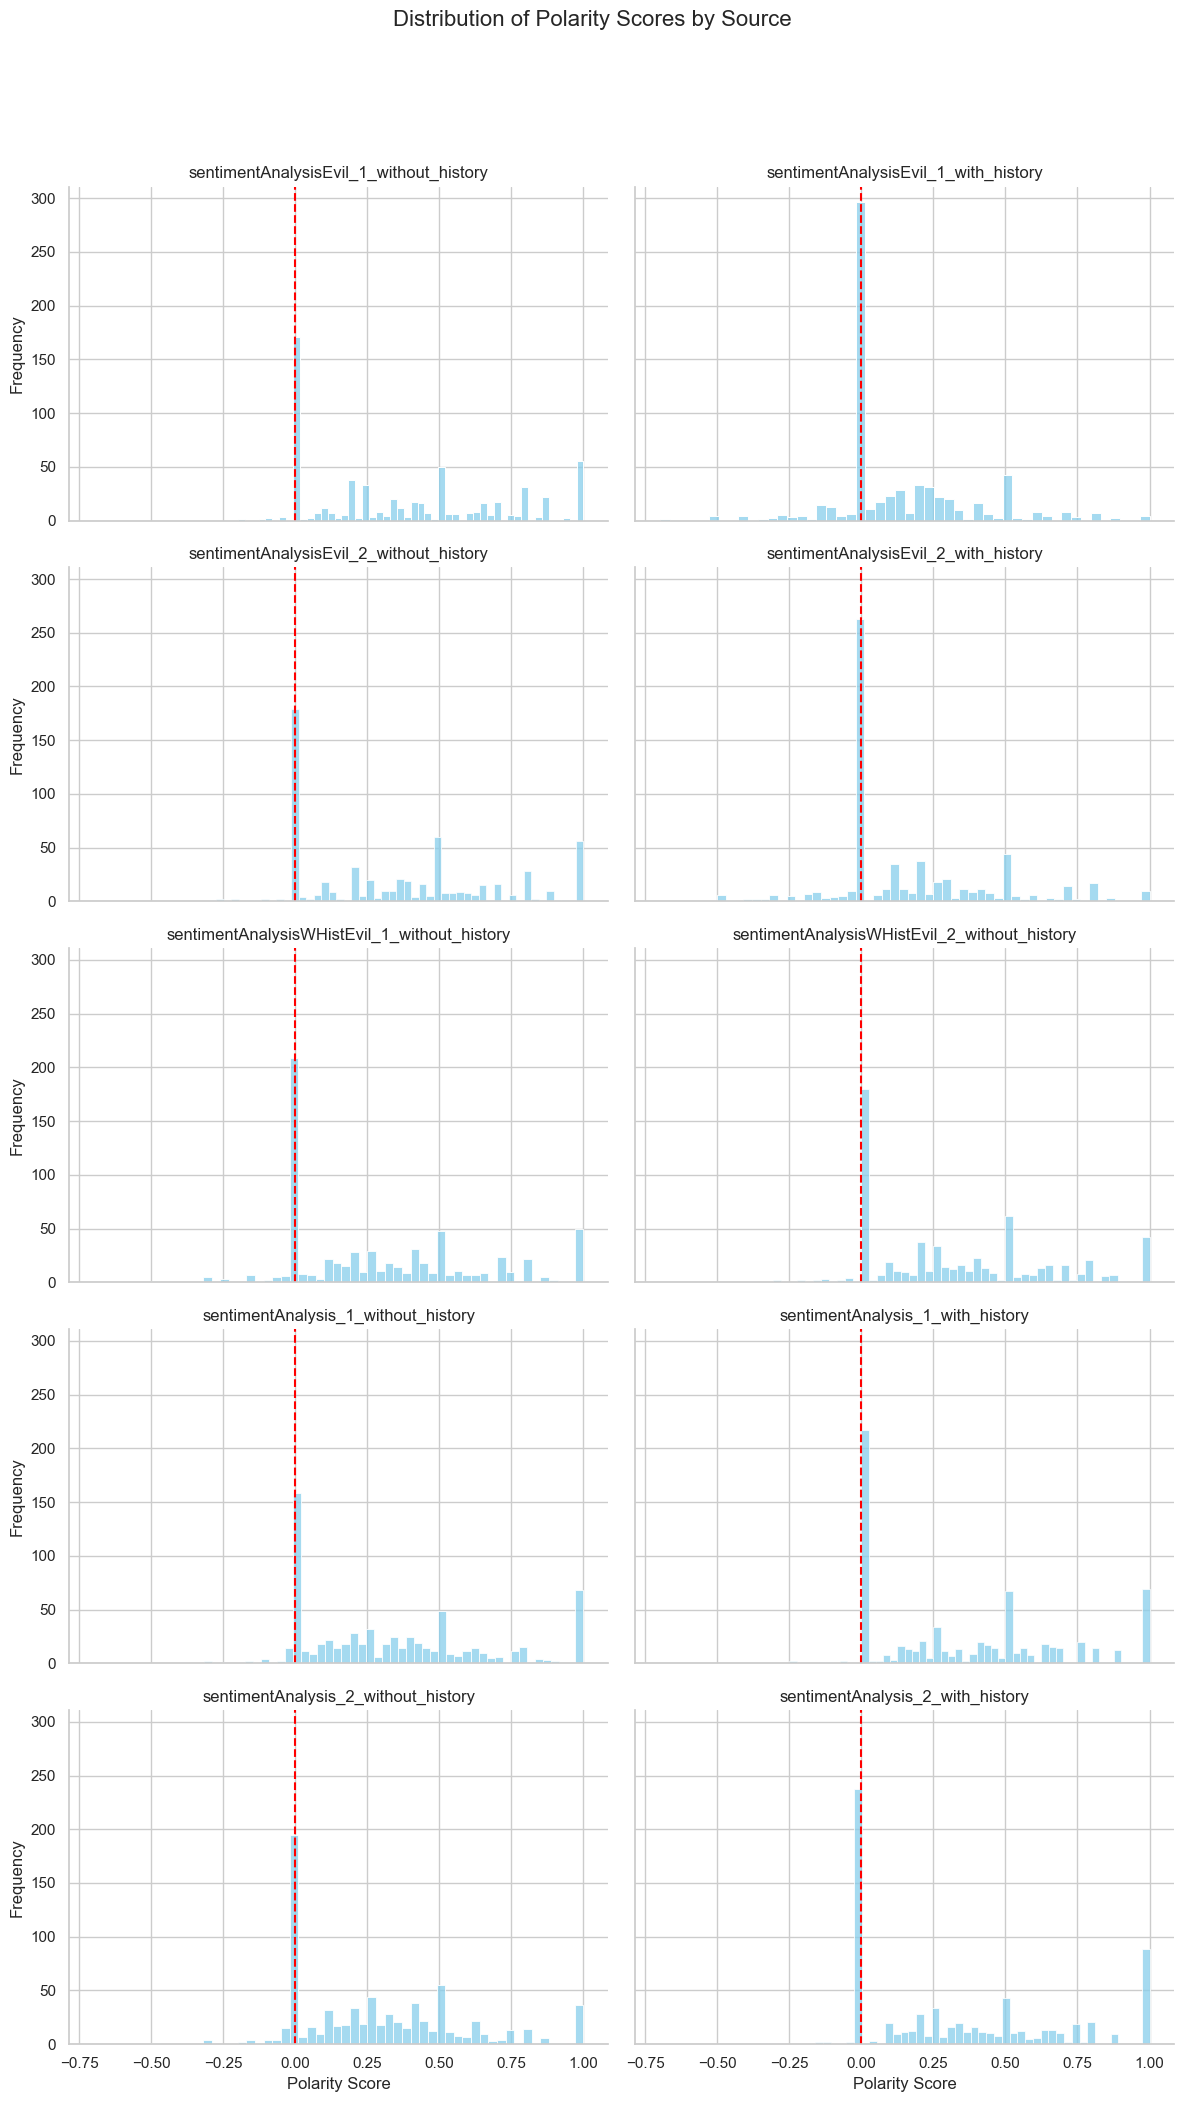

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a FacetGrid to generate a histogram for each source
g = sns.FacetGrid(utterances_df, col="Source", col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'Polarity', bins=50, kde=False, color='skyblue')

# Adding a title and adjusting spacing
g.fig.suptitle('Distribution of Polarity Scores by Source', fontsize=16, y=1.05)
g.set_titles('{col_name}')  # Set each subplot title to the name of the source
g.set_axis_labels('Polarity Score', 'Frequency')

# Adding a vertical line at x=0 on each subplot
for ax in g.axes.ravel():
    ax.axvline(x=0, color='red', linestyle='--')

# Adjusting the layout
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.formula.api as smf

utterances_df['Source'] = utterances_df['Source'].astype('category')

# Define the mixed-effects model
model = smf.mixedlm('Polarity ~ C(Source, Treatment(reference="sentimentAnalysis_1_without_history")) ', utterances_df, groups=utterances_df['Subject'])

# Fit the model
result = model.fit()

# Print the model summary to see the results
print(result.summary())


                                                             Mixed Linear Model Regression Results
Model:                                                MixedLM                                   Dependent Variable:                                   Polarity  
No. Observations:                                     6778                                      Method:                                               REML      
No. Groups:                                           20                                        Scale:                                                0.0993    
Min. group size:                                      295                                       Log-Likelihood:                                       -1827.3931
Max. group size:                                      388                                       Converged:                                            Yes       
Mean group size:                                      338.9                                     

c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
import statsmodels.formula.api as smf

# Assuming `utterances_df` is your DataFrame

# Correct the formula to use categorical coding with a reference
formula = "Polarity ~ C(Source, Treatment(reference='sentimentAnalysis_1_without_history')) + UtteranceOrder"

# Fit the model
model = smf.mixedlm(formula, 
                    data=utterances_df, 
                    groups=utterances_df["Subject"],
                    )

# Fit the model
mixed_effects_result = model.fit()

# Print the summary of the model
print(mixed_effects_result.summary())


                                                             Mixed Linear Model Regression Results
Model:                                                MixedLM                                   Dependent Variable:                                   Polarity  
No. Observations:                                     6778                                      Method:                                               REML      
No. Groups:                                           20                                        Scale:                                                0.0963    
Min. group size:                                      295                                       Log-Likelihood:                                       -1728.9099
Max. group size:                                      388                                       Converged:                                            Yes       
Mean group size:                                      338.9                                     

c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Assuming `df` is your DataFrame with the following columns:
# - 'Polarity': the dependent variable
# - 'Subject': a categorical variable representing different subjects (fixed effect)
# - 'UtteranceOrder': the order of the utterance within each conversation (random effect)
# - 'Conversation_ID': unique ID of each conversation (random effect grouping)

# Step 1: Prepare the data
endog = utterances_df['Polarity']  # Dependent variable
exog = sm.add_constant(utterances_df[['Subject']])  # Fixed effects (with an intercept)

# Step 2: Specify the grouping variable and random effects
groups = utterances_df['Conversation_ID']  # The grouping variable for random effects

# Random effects: UtteranceOrder nested within Conversation_ID
exog_re = utterances_df[['UtteranceOrder']]

# Step 3: Fit the model
model = MixedLM(endog, exog, groups=groups, exog_re=exog_re)
mixed_effects_result = model.fit()

# Step 4: Print the summary of the model
print(mixed_effects_result.summary())



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

C:\Users\finsc\AppData\Local\Temp\ipykernel_30204\3589556507.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(mixed_effects_result.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

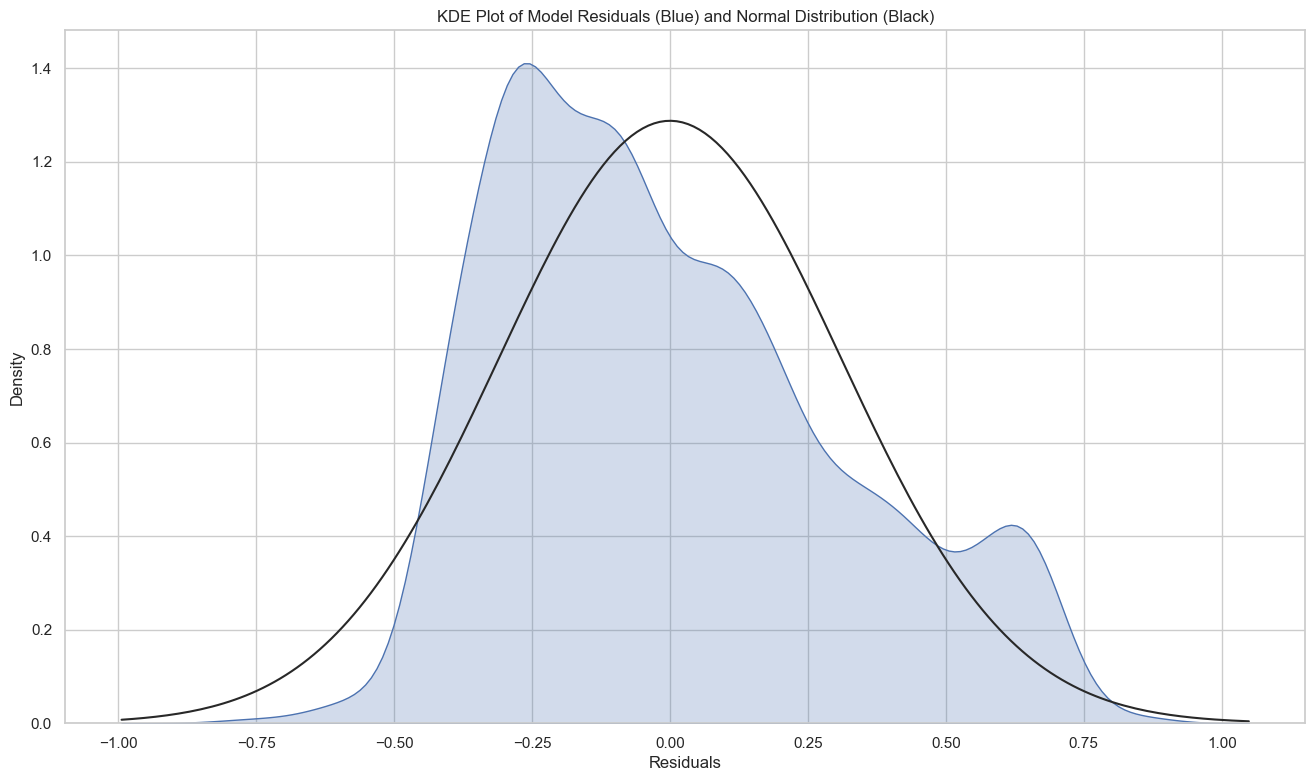

In [ ]:
import scipy.stats as stats
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(mixed_effects_result.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

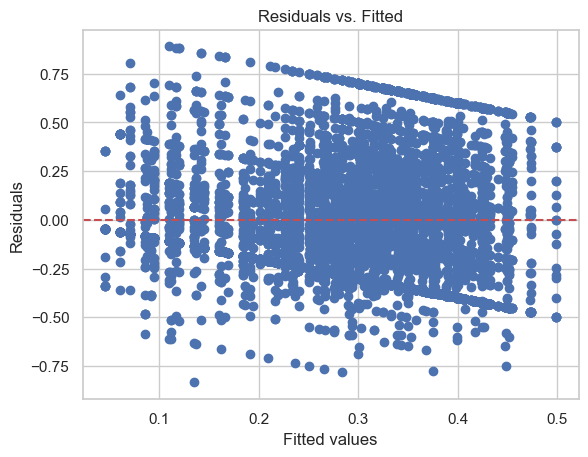

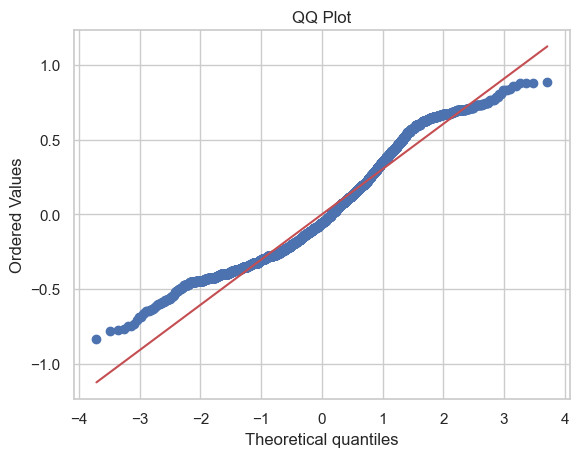

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = mixed_effects_result.resid
fitted = mixed_effects_result.fittedvalues

# Residuals vs. Fitted
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# QQ Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming `utterances_df` is the DataFrame containing all utterances
# with columns: 'Polarity', 'Source', 'Conversation_ID', 'Subject', 'UtteranceOrder'

# Prepare the model
# This model includes UtteranceOrder as a fixed effect and allows the random intercept and slope for UtteranceOrder within each conversation
model = smf.mixedlm("Polarity ~ Source + UtteranceOrder", 
                    utterances_df, 
                    groups=utterances_df["Subject"],
                    re_formula="~UtteranceOrder + Conversation_ID")

# Fit the model
mixed_effects_result = model.fit()

# Print the summary of the model
print(mixed_effects_result.summary())


c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                             Mixed Linear Model Regression Results
Model:                          MixedLM              Dependent Variable:              Polarity  
No. Observations:               6778                 Method:                          REML      
No. Groups:                     20                   Scale:                           0.0948    
Min. group size:                295                  Log-Likelihood:                  -1826.7883
Max. group size:                388                  Converged:                       No        
Mean group size:                338.9                                                           
------------------------------------------------------------------------------------------------
                                                       Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                               0.08

c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 119.799700
  warnings.warn(msg, ConvergenceWarning)
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\finsc\SentimentAnalysis\.spaCy\lib\site-packages\statsmodels\regress